# 0. Librerías de apoyo

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv

from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import imutils

# 1. Importando imagen de prueba

In [37]:
nombre_archivo='figuras/segunda/segunda_00328.jpg'#nombre_archivo='figuras/segunda/segunda_00374.jpg'

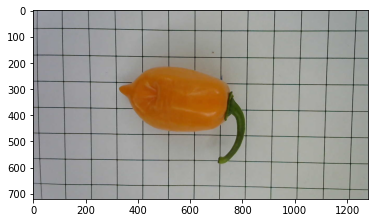

In [38]:
img = cv.imread(nombre_archivo)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

# 2. Aplicando mascara de color a la imagen

In [39]:
def hsv_convert(image):
    return cv.cvtColor(img, cv.COLOR_BGR2HSV)

In [40]:
# Regresa la imagen en escala de grises
def grey(image):
    return cv.cvtColor(image, cv.COLOR_BGR2GRAY)

In [41]:
#Definimos una función que retorne la mascara para el color rojo
def f_mask_green(image):
#    lower_green = np.array([6,100,7])
    lower_green = np.array([6,64,7])
    upper_green = np.array([78,255,255])
    
    img_hsv=hsv_convert(image)
    mask_green = cv.inRange(img_hsv,lower_green,upper_green)
    
    return mask_green

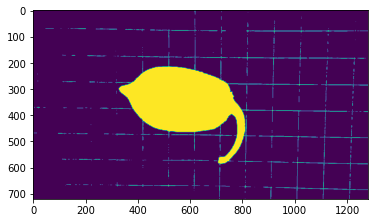

In [42]:
img = cv.imread(nombre_archivo)
img_mask=f_mask_green(img)
plt.imshow(img_mask)

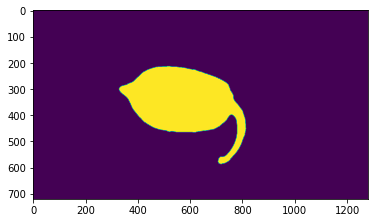

In [43]:
img_mask = cv.medianBlur(img_mask,13)
plt.imshow(img_mask)

In [44]:
img_mask=np.logical_not(img_mask)

In [45]:
img[img_mask] = 0

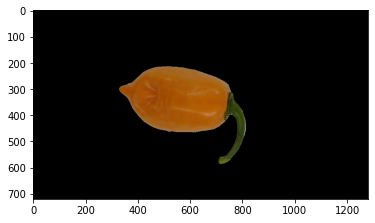

In [46]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_2 = img
plt.imshow(img)
plt.show()

In [47]:
img.shape

(720, 1280, 3)

# 3. Eliminación del pendúnculo

In [48]:
def contornos(img):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    blurred = cv.medianBlur(gray,5)#13)
    thr, imagen_th_grey = cv.threshold(blurred, 1,255, cv.THRESH_BINARY)
    edged = cv.Canny(imagen_th_grey, 1, 150)

    cnts = cv.findContours(edged.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    (cnts, _) = contours.sort_contours(cnts)


    mayor=0
    mayor_i=0
    #print(len(cnts[0])) 
    #print(len(cnts[1])) 
    
    for i in range(len(cnts)) :
        if len(cnts[i]) > mayor :
            mayor_i = i
            mayor = len(cnts[i])
    return [cnts[mayor_i]]

In [49]:
# función para quitar el pendúnculo
def digit(img):
    kernel = np.ones((5,5),np.uint8)
    img_mask=f_mask_green(img)
    img_mask = cv.medianBlur(img_mask,13)
    img_mask=np.logical_not(img_mask)
    img[img_mask] = 0
    img_opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel, iterations=9) #12
    #img_opening = cv.dilate(img_opening,kernel,iterations = 10) #
    img_grey=grey(img_opening)
    thr, imagen_th_grey = cv.threshold(img_grey, 4,255, cv.THRESH_TOZERO)
    img_mask2=np.logical_not(imagen_th_grey)
    img[img_mask2] = 0
    
    cnts= contornos(img)
    print(len(cnts[0]))
    
        
    mask = np.zeros(img.shape, np.uint8)
    img_mask_cnts = cv.drawContours(mask, cnts, -1, (255,255,255),-1)
    img_mask_cnts=np.logical_not(img_mask_cnts)
    
    img[img_mask_cnts] = 0
    
    return img

424
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


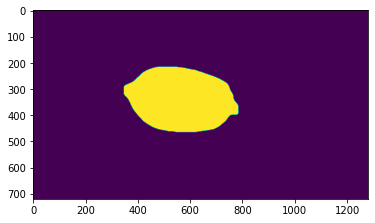

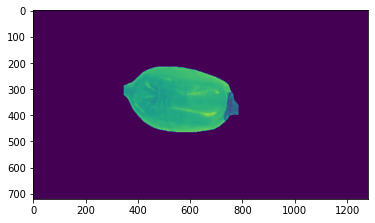

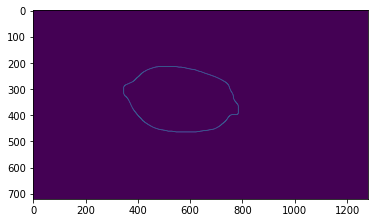

In [50]:
img = cv.imread(nombre_archivo)
img = digit(img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blurred = cv.medianBlur(gray,13)
thr, imagen_th_grey = cv.threshold(blurred, 1,255, cv.THRESH_BINARY)
edged = cv.Canny(imagen_th_grey, 1, 150)

cnts = cv.findContours(edged.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
(cnts, _) = contours.sort_contours(cnts)



mayor=0
mayor_i=0
for i in range(len(cnts)) :
    if len(cnts[i]) > mayor :
        mayor_i = i
        mayor = len(cnts[i])
cnts=[cnts[mayor_i]]

print(edged)
plt.imshow(imagen_th_grey)
plt.show()
plt.imshow(gray)
plt.show()
plt.imshow(edged)
plt.show()

424


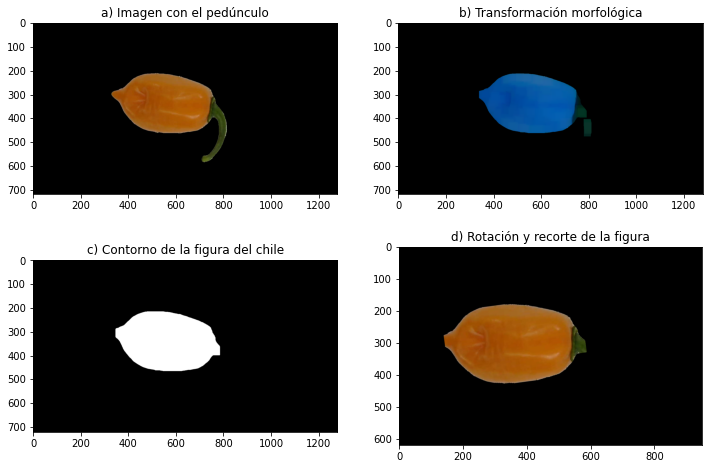

In [51]:
img = cv.imread(nombre_archivo)

kernel = np.ones((5,5),np.uint8)
img_mask=f_mask_green(img)
img_mask = cv.medianBlur(img_mask,13)
img_mask=np.logical_not(img_mask)
img[img_mask] = 0
img_opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel, iterations=9) #12
img_opening_2 = cv.morphologyEx(img, cv.MORPH_OPEN, kernel, iterations=7)
#img_opening = cv.dilate(img_opening,kernel,iterations = 10) #
img_grey=grey(img_opening)
thr, imagen_th_grey = cv.threshold(img_grey, 4,255, cv.THRESH_TOZERO)
img_mask2=np.logical_not(imagen_th_grey)
img[img_mask2] = 0

cnts= contornos(img)
print(len(cnts[0]))

    
mask = np.zeros(img.shape, np.uint8)
img_mask_cnts = cv.drawContours(mask, cnts, -1, (255,255,255),-1)
img_mask_cnts=np.logical_not(img_mask_cnts)

img[img_mask_cnts] = 0

minRect = [None]*len(cnts)
minEllipse = [None]*len(cnts)

for i, c in enumerate(cnts):
    minRect[i] = cv.minAreaRect(c)
    if c.shape[0] > 5:
        minEllipse[i] = cv.fitEllipse(c)

rot_median=100

# use our imutils function to rotate an image 180 degrees
if  rot_median > 140 :
    rotacion = minEllipse[0][2] + 180
elif rot_median < 50 :
    rotacion = minEllipse[0][2] 
else :
    rotacion = minEllipse[0][2] - 90
    
img_n = imutils.rotate(img, rotacion)

img_n=img_n[50:670,200:1150]


img_n = cv.cvtColor(img_n, cv.COLOR_BGR2RGB)
#plt.imshow(cv.drawContours(mask, cnts, -1, (255,255,255),-1))


#img_2, img_opening, cv.drawContours(mask, cnts, -1, (255,255,255),-1), img_n

plt.figure(figsize=(12 , 8))
plt.subplot(2,2,1)
plt.imshow(img_2)
plt.title("a) Imagen con el pedúnculo")
plt.subplot(2,2,2)
plt.imshow(img_opening_2)
plt.title("b) Transformación morfológica")
plt.subplot(2,2,3)
plt.imshow(cv.drawContours(mask, cnts, -1, (255,255,255),-1))
plt.title("c) Contorno de la figura del chile")
plt.subplot(2,2,4)
plt.imshow(img_n)
plt.title("d) Rotación y recorte de la figura")


plt.show()

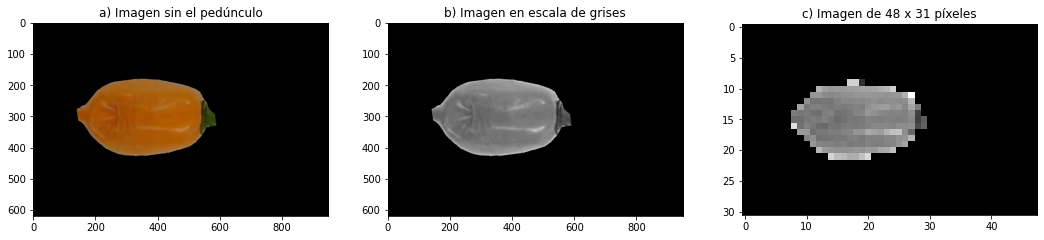

In [52]:
img_gray = cv.cvtColor(img_n, cv.COLOR_BGR2GRAY)
img_r = cv.resize(img_gray, (48,31), interpolation = cv.INTER_NEAREST)

plt.figure(figsize=(18 , 5))
plt.subplot(1,3,1)
plt.imshow(img_n)
plt.title("a) Imagen sin el pedúnculo")
plt.subplot(1,3,2)
plt.imshow(img_gray, cmap='gray')
plt.title("b) Imagen en escala de grises")
plt.subplot(1,3,3)
plt.imshow(img_r, cmap='gray')
plt.title("c) Imagen de 48 x 31 píxeles")



plt.show()

# 4. Imagen con el contorno de la Elipse

## 4.1 Dimensiones

In [17]:

def midpoint(ptA, ptB):
# compute and return the midpoint between the two input points
    return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)


#Referencias

https://docs.opencv.org/3.4/de/d62/tutorial_bounding_rotated_ellipses.html

https://docs.opencv.org/master/dc/da5/tutorial_py_drawing_functions.html

## 4.2 Drawing Ellipse
To draw the ellipse, we need to pass several arguments. One argument is the center location (x,y). Next argument is axes lengths (major axis length, minor axis length). angle is the angle of rotation of ellipse in anti-clockwise direction. startAngle and endAngle denotes the starting and ending of ellipse arc measured in clockwise direction from major axis. i.e. giving values 0 and 360 gives the full ellipse. For more details, check the documentation of cv.ellipse(). Below example draws a half ellipse at the center of the image.

424
390


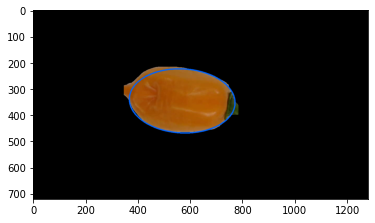

[((569.5982055664062, 345.8023986816406), (243.89869689941406, 404.36932373046875), 93.36076354980469)]


In [19]:
from __future__ import print_function
import cv2 as cv
import numpy as np
import argparse
import random as rng

from imutils import perspective
from imutils import contours
import imutils

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv

from scipy.spatial import distance as dist

rng.seed(12345)

img = cv.imread(nombre_archivo)
#img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
image = digit(img)



cnts= contornos(image)



minRect = [None]*len(cnts)
minEllipse = [None]*len(cnts)

for i, c in enumerate(cnts):
    minRect[i] = cv.minAreaRect(c)
    if c.shape[0] > 5:
        minEllipse[i] = cv.fitEllipse(c)

rot_median=100

# use our imutils function to rotate an image 180 degrees
if  rot_median > 140 :
    rotacion = minEllipse[0][2] + 180
elif rot_median < 50 :
    rotacion = minEllipse[0][2] 
else :
    rotacion = minEllipse[0][2] - 90
    
rotated = imutils.rotate(img, rotacion)


#plt.imshow(rotated)
#plt.show()


rotated = digit(rotated)



cnts= contornos(rotated)
minRect = [None]*len(cnts)
minEllipse = [None]*len(cnts)



for i, c in enumerate(cnts):
    minRect[i] = cv.minAreaRect(c)
    if c.shape[0] > 5:
        minEllipse[i] = cv.fitEllipse(c)

rotated= cv.cvtColor(rotated, cv.COLOR_BGR2RGB)



#for c in cnts:
    #for i in c:
        #dA = dist.euclidean(elipse, c[i])
        #dB = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))
            
        #dimA = dA
        #dimB = dB
        #print(dimA)
        #print('Dimensión A: ',dimA,'Dimensión B: ',dimB)    
        #cv.putText(orig, "{:.2f}".format(dimA), (int(tltrX - 15), int(tltrY - 10)), cv.FONT_HERSHEY_SIMPLEX, 2., (255, 255, 255), 2)
        #cv.putText(orig, "{:.2f}".format(dimB), (int(trbrX + 10), int(trbrY)), cv.FONT_HERSHEY_SIMPLEX, 2., (255, 255, 255), 2)


    
img= imutils.rotate(image, rotacion)
img=cv.cvtColor(image, cv.COLOR_BGR2RGB)

cv.ellipse(img,minEllipse[0],(0,100,255), 4)
plt.imshow(img)
plt.show()



print(minEllipse)


## 4.3 Datos de la elipse

In [20]:
print('centro', minEllipse[0][0])

centro (569.5982055664062, 345.8023986816406)


In [28]:
import math
def area_elipse(a,b):
    
    area=(a/2)*(b/2)*math.pi
    return print('El area de la elipse es %.3f ' % area)

def perimetro_elipse(a,b):
    #usando aproximación de Ramanujan
    perimetro=math.pi*(3.0*(a+b)-math.sqrt((3.0*a+b)*(a+3.0*b)))
    return print('El perimetro de la elipse es %.3f ' % perimetro)

In [25]:
centerx_elipse= np.array(minEllipse[0][0])[0]
centery_elipse= np.array(minEllipse[0][0])[1]

large_elipse= np.array(minEllipse[0][1])[1]
width_elipse= np.array(minEllipse[0][1])[0]



In [26]:
area_elipse(large_elipse, width_elipse)

El area de la elipse es 77460.013 


In [29]:
perimetro_elipse(large_elipse, width_elipse)

El perimetro de la elipse es 2067.912 


# 5. Exportando las imágenes con la rotación, fondo negro y sin el pedúnculo

In [96]:
from __future__ import print_function
import cv2 as cv
import numpy as np
import argparse
import random as rng

from imutils import perspective
from imutils import contours
import imutils

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv

from scipy.spatial import distance as dist

#Crear el DataFrame
from glob import glob
count = 0
i=0
#df_chiles_primera = pd.DataFrame()
#for imagen in glob('mis_numeros/numeros_varios/numeros_isaac/IMG_*.jpg'):

#for imagen in glob('figuras/primera/primera_*.jpg'):
#for imagen in glob('figuras/segunda/segunda_*.jpg'):
for imagen in glob('figuras/tercera/tercera_*.jpg'):
    print(count)
    print(imagen)


    rng.seed(12345)

    img = cv.imread(imagen)
    #img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    image = digit(img)



    cnts= contornos(image)



    minRect = [None]*len(cnts)
    minEllipse = [None]*len(cnts)

    for i, c in enumerate(cnts):
        minRect[i] = cv.minAreaRect(c)
        if c.shape[0] > 5:
            minEllipse[i] = cv.fitEllipse(c)

    rot_median=100

    # use our imutils function to rotate an image 180 degrees
    if  rot_median > 140 :
        rotacion = minEllipse[0][2] + 180
    elif rot_median < 50 :
        rotacion = minEllipse[0][2] 
    else :
        rotacion = minEllipse[0][2] - 90
        
    img_n = imutils.rotate(img, rotacion)

    img_n=img_n[50:670,200:1150]
    #img_b=img_n.copy()
    #img_b[np.where((img_b==[0,0,0]).all(axis=2))] = [255,255,255]

    #cv.imwrite('muestras_rotadas/Primera/imagen_primera_fondo-negro_'+str(count)+'.jpg',img_n) 
    #cv.imwrite('muestras_rotadas/Segunda/imagen_segunda_fondo-negro_'+str(count)+'.jpg',img_n)
    cv.imwrite('muestras_rotadas/Tercera/imagen_tercera_fondo-negro_'+str(count)+'.jpg',img_n) 

    #cv.imwrite('muestras/imagen_primera_fondo-blanco_'+str(count)+'.jpg',img_b)   
    i = i + 1
    count = count + 1
    if count == 579 :
        break


0
figuras/tercera\tercera_00001.jpg
380
1
figuras/tercera\tercera_00002.jpg
366
2
figuras/tercera\tercera_00003.jpg
374
3
figuras/tercera\tercera_00004.jpg
450
4
figuras/tercera\tercera_00005.jpg
434
5
figuras/tercera\tercera_00006.jpg
498
6
figuras/tercera\tercera_00007.jpg
431
7
figuras/tercera\tercera_00008.jpg
424
8
figuras/tercera\tercera_00009.jpg
524
9
figuras/tercera\tercera_00010.jpg
391
10
figuras/tercera\tercera_00011.jpg
434
11
figuras/tercera\tercera_00012.jpg
380
12
figuras/tercera\tercera_00013.jpg
400
13
figuras/tercera\tercera_00014.jpg
516
14
figuras/tercera\tercera_00015.jpg
461
15
figuras/tercera\tercera_00016.jpg
488
16
figuras/tercera\tercera_00017.jpg
472
17
figuras/tercera\tercera_00018.jpg
526
18
figuras/tercera\tercera_00019.jpg
301
19
figuras/tercera\tercera_00020.jpg
445
20
figuras/tercera\tercera_00021.jpg
403
21
figuras/tercera\tercera_00022.jpg
458
22
figuras/tercera\tercera_00023.jpg
397
23
figuras/tercera\tercera_00024.jpg
508
24
figuras/tercera\tercera

# 6. Dataframes con Aumento de Datos (DA)

In [ ]:
#Crear el DataFrame
from glob import glob
count = 0
i=0
df_chiles_primera = pd.DataFrame()
#for imagen in glob('mis_numeros/numeros_varios/numeros_isaac/IMG_*.jpg'):

for imagen in glob('figuras/primera/primera_*.jpg'):
#for imagen in glob('figuras/segunda/segunda_*.jpg'):
#for imagen in glob('figuras/tercera/tercera_*.jpg'):
    print(count)
    print(imagen)
    img=cv.imread(imagen)
    img_n=digit(img)
    img_n=img_n[50:670,200:1150]
    img_flip_v= cv.flip(img_n, 0)
    img_flip_h= cv.flip(img_n, 1)
    img_flip_both= cv.flip(img_n, -1)
    #img_b=img_n.copy()
    #img_b[np.where((img_b==[0,0,0]).all(axis=2))] = [255,255,255]

    cv.imwrite('muestras_DA/Primera/imagen_primera_fondo-negro_'+str(count)+'.jpg',img_n) 
    cv.imwrite('muestras_DA/Primera/imagen_primera_fondo-negro_flip_v'+str(count)+'.jpg',img_flip_v)
    cv.imwrite('muestras_DA/Primera/imagen_primera_fondo-negro_flip_h'+str(count)+'.jpg',img_flip_h)
    cv.imwrite('muestras_DA/Primera/imagen_primera_fondo-negro_flip_both'+str(count)+'.jpg',img_flip_both)

    #cv.imwrite('muestras_DA/Segunda/imagen_segunda_fondo-negro_'+str(count)+'.jpg',img_n)
    #cv.imwrite('muestras_DA/Segunda/imagen_segunda_fondo-negro_flip_v'+str(count)+'.jpg',img_flip_v)
    #cv.imwrite('muestras_DA/Segunda/imagen_segunda_fondo-negro_flip_h'+str(count)+'.jpg',img_flip_h)
    #cv.imwrite('muestras_DA/Segunda/imagen_segunda_fondo-negro_flip_both'+str(count)+'.jpg',img_flip_both)

    #cv.imwrite('muestras_DA/Tercera/imagen_tercera_fondo-negro_'+str(count)+'.jpg',img_n) 
    #cv.imwrite('muestras_DA/Tercera/imagen_tercera_fondo-negro_flip_v'+str(count)+'.jpg',img_flip_v)
    #cv.imwrite('muestras_DA/Tercera/imagen_tercera_fondo-negro_flip_h'+str(count)+'.jpg',img_flip_h)
    #cv.imwrite('muestras_DA/Tercera/imagen_tercera_fondo-negro_flip_both'+str(count)+'.jpg',img_flip_both)

    #cv.imwrite('muestras/imagen_primera_fondo-blanco_'+str(count)+'.jpg',img_b)   
    i = i + 1
    count = count + 1
    if count == 815 :
    #if count == 1205 :
    #if count == 580 :
        break


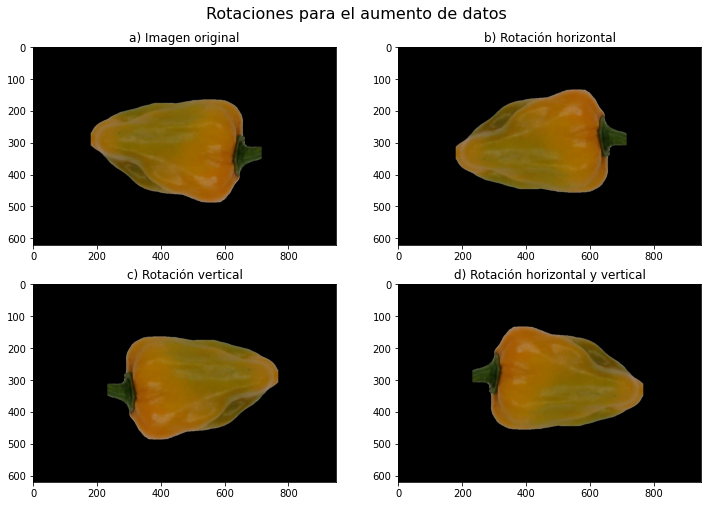

In [53]:
img_1=cv.imread('muestras_DA/Primera/Training/imagen_primera_fondo-negro_0.jpg')
img_1 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)

img_2=cv.imread('muestras_DA/Primera/Training/imagen_primera_fondo-negro_flip_v0.jpg')
img_2 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)

img_3=cv.imread('muestras_DA/Primera/Training/imagen_primera_fondo-negro_flip_h0.jpg')
img_3 = cv.cvtColor(img_3, cv.COLOR_BGR2RGB)

img_4=cv.imread('muestras_DA/Primera/Training/imagen_primera_fondo-negro_flip_both0.jpg')
img_4 = cv.cvtColor(img_4, cv.COLOR_BGR2RGB)

plt.figure(figsize=(12 , 8))
plt.subplot(2,2,1)
plt.imshow(img_1)
plt.title("a) Imagen original")
plt.subplot(2,2,2)
plt.imshow(img_2)
plt.title("b) Rotación horizontal")
plt.subplot(2,2,3)
plt.imshow(img_3)
plt.title("c) Rotación vertical")
plt.subplot(2,2,4)
plt.imshow(img_4)
plt.title("d) Rotación horizontal y vertical")
plt.suptitle("Rotaciones para el aumento de datos", fontsize=16, y=0.95)


plt.show()